<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/MINST-Digits-Classification/blob/main/MINST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import math

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

(60000, 28, 28)
(60000,)


In [4]:
own_images = []

for i in range(0,10):
  own_images.append(f'/content/{i}a.png')
  own_images.append(f'/content/{i}b.png')

sample_x = []
sample_y = []

test_samples_x = []

for i in range(0, len(own_images)):
  img = image.load_img(own_images[i], target_size=(28,28), color_mode='grayscale')
  img_array = image.img_to_array(img)
  img_array = img_array / 255.0
  img_array = 1.0 - img_array
  img_array = np.expand_dims(img_array, axis=0)
  test_samples_x.append(img_array.squeeze())
  if(i%2==0):
    sample_x.append(img_array.squeeze())
    sample_y.append(round(i/2))

In [5]:
sample_x = np.array(sample_x)
sample_y = np.array(sample_y)

In [6]:
sample_y.shape

(10,)

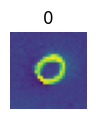

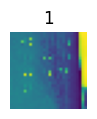

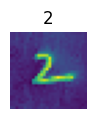

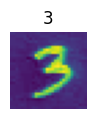

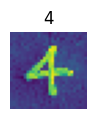

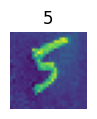

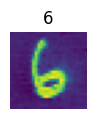

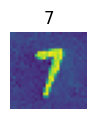

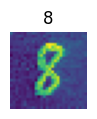

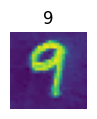

In [7]:
for i in range(0, len(sample_x)):
  plt.figure(figsize=(1,1))
  plt.imshow(sample_x[i])
  plt.title(sample_y[i])
  plt.axis('off')
  plt.show()

In [8]:
new_x = np.concatenate((x_train, sample_x), axis=0)
new_y = np.concatenate((y_train, sample_y), axis=0)

In [9]:
print(new_x.shape)
print(new_y.shape)

(60010, 28, 28)
(60010,)


In [ ]:
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(new_x.reshape(-1,1)).toarray()
y_test_ohe = ohe.transform(new_y.reshape(-1,1)).toarray()

In [ ]:
plt.figure(figsize=(20,10))

for i in range(1,101):
  plt.subplot(5,20,i)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
np.unique(y_train)

In [ ]:
model = Sequential([
    Input(shape=(new_x.shape[1], new_x.shape[2])),
    Flatten(),
    Dense(64, activation='relu', name='L1'),
    Dense(16, activation='relu', name='L2'),
    Dense(10, activation='softmax', name='L3')
], name='my_model')

In [ ]:
model.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001)
)

In [ ]:
model.fit(new_x, y_train_ohe, epochs=100)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(np.argmax(y_pred[0]))
print(y_pred[0])
plt.figure(figsize=(1,1))
plt.imshow(x_test[0])
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))

for i in range(1, 200):
  plt.subplot(10,20,i)
  plt.imshow(x_test[i])
  plt.title(f'{np.argmax(y_pred[i])} ({y_test[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
misclassified_x = []
misclassified_y = []
actual_y = []

for i in range(1, len(x_test)):
  if(np.argmax(y_pred[i]) != y_test[i]):
    misclassified_x.append(x_test[i])
    misclassified_y.append(np.argmax(y_pred[i]))
    actual_y.append(y_test[i])

print(len(misclassified_x))

plt.figure(figsize=(37,10))

for i in range(0,len(misclassified_x)):
  plt.subplot(math.ceil(len(misclassified_x) / 10) ,10,i+1)
  plt.imshow(misclassified_x[i])
  plt.title(f'{misclassified_y[i]} ({actual_y[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
accuracy_score(y_test, np.argmax(y_pred, axis=1))

In [ ]:
# test_images = []

# for i in range(0,10):
#   test_images.append(f'/content/{i}a.png')
#   test_images.append(f'/content/{i}b.png')

In [ ]:
# for i in range(0, len(test_images)):
#   img = image.load_img(test_images[i], target_size=(28,28), color_mode='grayscale')
#   img_array = image.img_to_array(img)
#   img_array = img_array / 255.0
#   img_array = 1.0 - img_array
#   img_array = np.expand_dims(img_array, axis=0)
#   predicted = model.predict(img_array)
#   print(predicted)
#   plt.figure(figsize=(1,1))
#   plt.imshow(img_array[0], cmap='gray')
#   plt.title(np.argmax(predicted))
#   plt.axis('off')
#   plt.show()